In [2]:
import mne
import pandas as pd

import matplotlib.pyplot as plt
from mne.datasets.sleep_physionet.age import fetch_data

Extracting EDF parameters from c:\Users\49380010\Desktop\NeuroLinked\edf\S001R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...


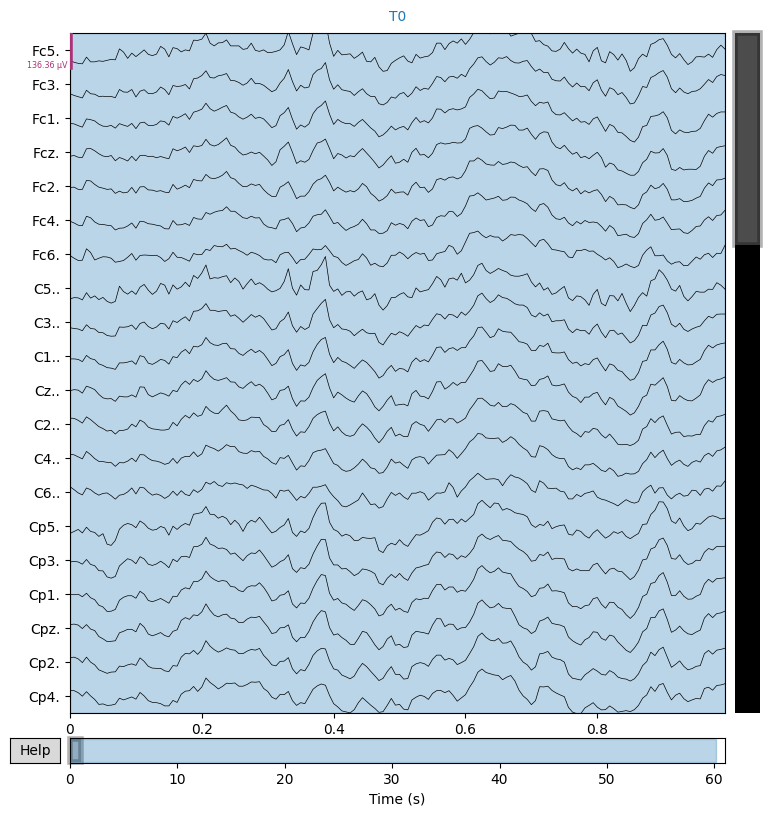

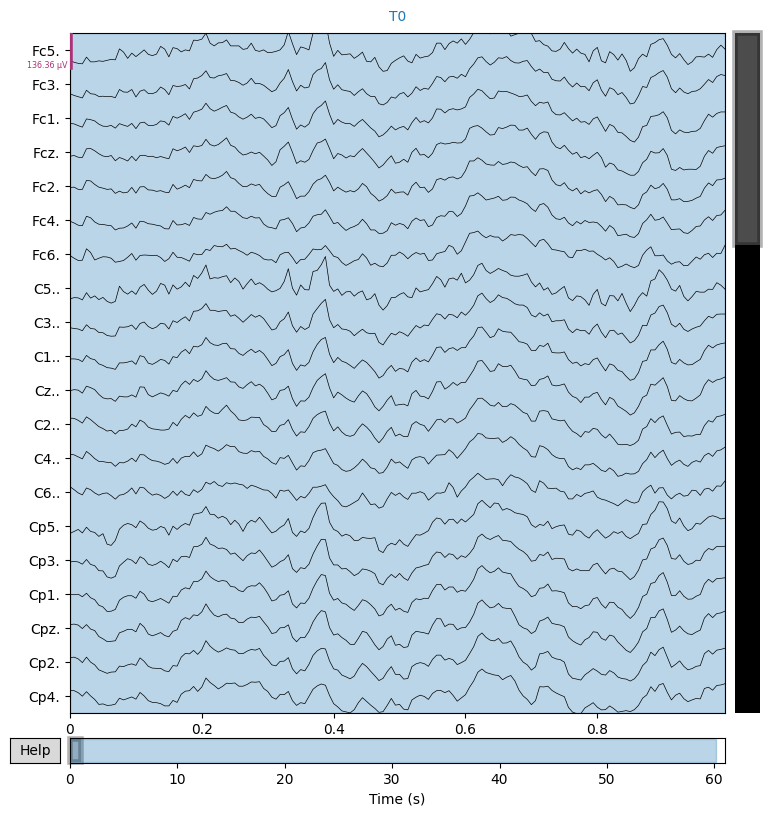

In [10]:
local_path = "../edf/S001R02.edf"

raw = mne.io.read_raw_edf(local_path, preload=True)

raw.plot(duration=1, scalings='auto')
